<a href="https://colab.research.google.com/github/FranziskoB/Clusters/blob/main/Py_Clusters_Exemplo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clusters: Exemplo 2
Objetivo: categorizar os países por meio dos indicadores sociais e econômicos

##Importando as bibliotecas:

In [2]:
import pandas as pd
import seaborn as sns
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.cluster import hierarchy
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
import scipy.stats as stats
from sklearn.cluster import KMeans

##Importando os dados

In [3]:
dados=pd.read_csv("https://raw.githubusercontent.com/FranziskoB/Clusters/main/dados/dados_paises.csv")

Visualizando os dados

In [4]:
dados.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


##Estatísticas descritivas

In [5]:
dados.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Boxplots por variável

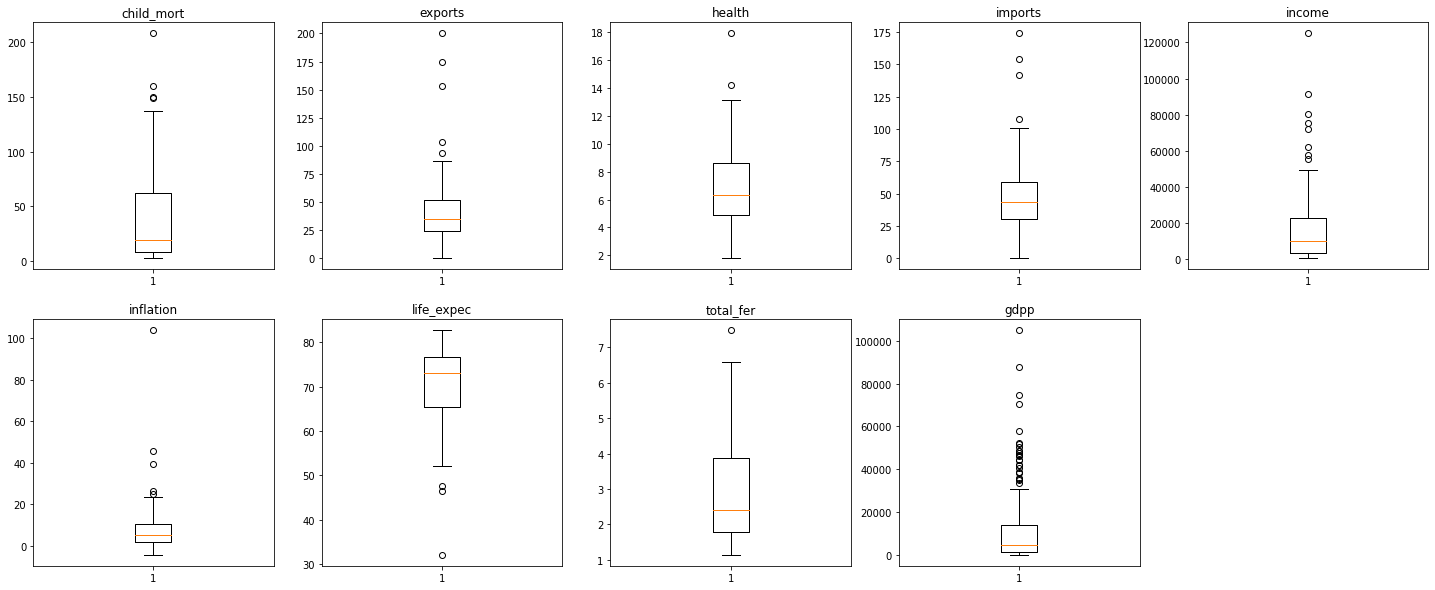

In [56]:
dados_metric=dados.drop(columns=['country']) # deixando apenas variáveis métricas
plt.figure(figsize=(25, 10))
i=1
for var in list(dados_metric.columns.values):
    plt.subplot(2, 5, i)
    plt.boxplot(dados_metric[var])
    plt.title(var)
    i=i+1
plt.show()


## Elaboração de dendogramas esquema de aglomeração hierárquico


Realizando a padronização dos dados utilizando o método Zscore

In [58]:
dados_scaled = dados_metric.copy()
dados_scaled.iloc[:, :] = StandardScaler().fit_transform(dados_metric)
dados_scaled.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


Elaborando o dendograma

*   Distância euclidiana e método de encadeamento single linkage



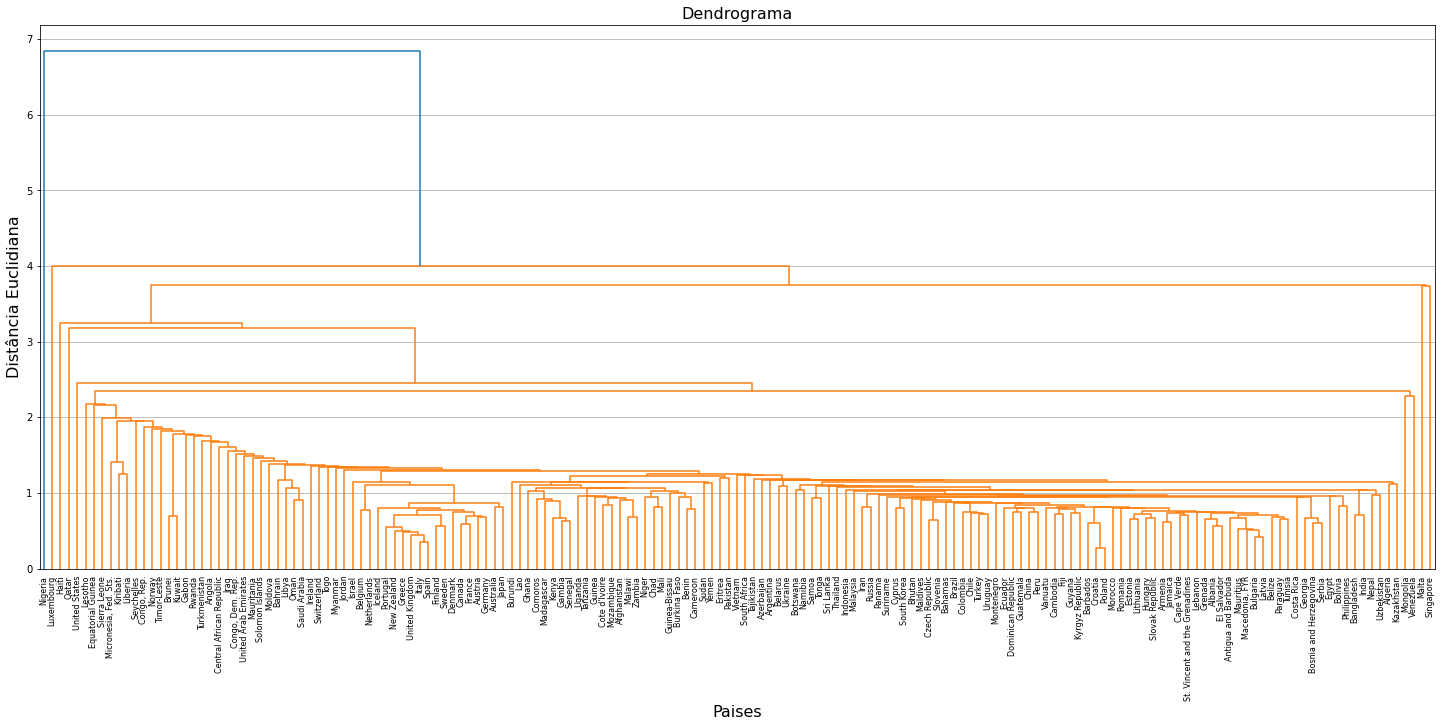

In [60]:

Z = hierarchy.linkage(dados_scaled, method='single', metric='euclidean')
plt.figure(figsize=(25, 10))
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(dados['country']), leaf_font_size=8)

plt.title('Dendrograma metodo single', fontsize=16)
plt.xlabel('Paises', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
#plt.axhline(y = 1.8, color = 'red', linestyle = '--')
plt.show()

Não ficou legal utilizando o método single



*   Distância euclidiana e método de encadeamento complete linkage

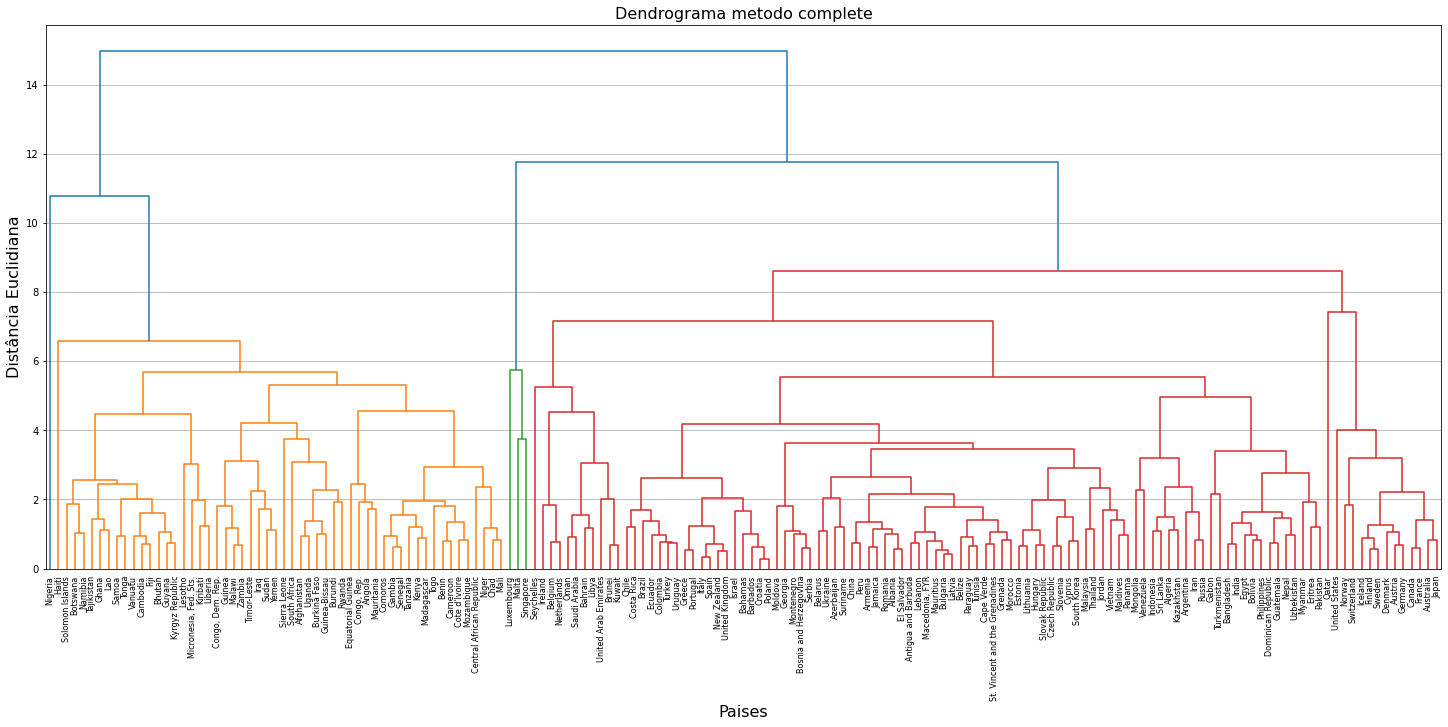

In [61]:

Z = hierarchy.linkage(dados_scaled, method='complete', metric='euclidean')
plt.figure(figsize=(25, 10))
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(dados['country']), leaf_font_size=8)

plt.title('Dendrograma metodo complete', fontsize=16)
plt.xlabel('Paises', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
#plt.axhline(y = 1.8, color = 'red', linestyle = '--')
plt.show()

##  Método Elbow cluster Não Hierárquico K-means

vamos utlizar o método Elbow para identificação do nº de clusters

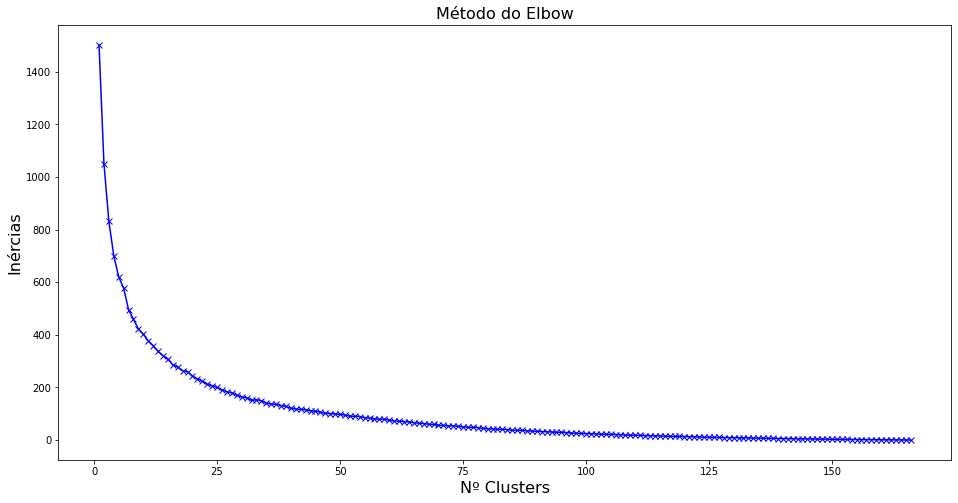

In [65]:
inercias = []
K = range(1,dados_metric.shape[0])
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(dados_scaled)
    inercias.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, inercias, 'bx-')
plt.xlabel('Nº Clusters', fontsize=16)
plt.ylabel('Inércias', fontsize=16)
plt.title('Método do Elbow', fontsize=16)
plt.show()

Analisando o gráfico acima Vamos utilizar 20 cluters

## Aplicando o esquema de aglomeração hierárquico e o esquema Kmeans

Aplicando o método hierárquico para definição de clusters

In [66]:
cluster_sing = AgglomerativeClustering(n_clusters = 20, affinity = 'euclidean', linkage = 'complete')
indica_cluster_sing = cluster_sing.fit_predict(dados_metric) # Retorna uma lista de valores com o cluster de cada observação
dados['cluster_hier'] = indica_cluster_sing
print(indica_cluster_sing, "\n")

[18  3  5  3  2  2  3  4  6  5  1 13 18  7  5  6  3 18  3  3  3  5  7  9
  5 18 18 18 18  6  3 18 18  2  3  5 18 18  3  5 18  2  0 19  4  5  3  3
  3 12 18  2  3  6  0  5 18  3  6 18  1  5  3 18 18  3 18  2  6 18  3  5
  5  8  1  0  3  6  3  2 18 18  9 18 18  2  5 18 18 12  2 11  3 18 18  2
  5 18 19 18  5 18 18  3  5  3 18 18  3 18  8  0 18  3 14 13 18  5  3  3
  3  2 19 15  5  2 18  3 13 18  5  2 18 16  2 19 18  5 19  0  3  5 18  5
  4 17 18 18  5 18 18  3  3  2  3 18  3 10  0  8  7 18 18  7 18 18 18] 



Aplicando o Kmeans

In [70]:
kmeans = KMeans(n_clusters = 20, init = 'random').fit(dados_metric)
kmeans_clusters = kmeans.labels_
dados['cluster_kmeans'] = kmeans_clusters
print(kmeans_clusters)

[ 3  0  9 17  5  5 19 15 15  8  4  4 12  5  8 15 19 18 16 16  0  9  8 13
  8  3  7 12 12 15 17  7 18  5  0  1  3  7 16 14 12  5  4  4 15  1  0  0
 19  4  3  5 19 15 15  8  3 19 15 12  4 14 19  3  3 17  3  5 15  2 19  8
  9 15  4 15 19 15  0  5 12 18 13 12  2  5  8 12  7  5  5 10  1  3  7  5
 14 18  4  2  8  6  2 19  9 16  7  2  0 18 15  4  7 16 11  4  2  8 19  1
 16  5  4 10  8  5  3 17  4 18  9  5  3 13  5  4 18 14  4  4 19  1  2  8
 15 11 18 18  9  6  3 17  0  5  0  3 19 13 15 15  5  2  6  5  2  2  2]


## Analisando os resultados

Em qual grupo o Brasil ficou ?

In [71]:
dados[dados['country']=='Brazil'] 


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_hier,cluster_kmeans
22,Brazil,19.8,10.7,9.01,11.8,14500,8.41,74.2,1.8,11200,7,8


Grupos 7 e 8

E quais paises ficaram nos mesmos grupos do Brasil?

In [76]:
print('Grupo 7 \n',dados[dados['cluster_hier']==7].country.values)
print('Grupo 8 \n',dados[dados['cluster_kmeans']==8].country.values)

Grupo 7 
 ['Barbados' 'Brazil' 'Uruguay' 'Venezuela']
Grupo 8 
 ['Azerbaijan' 'Belarus' 'Brazil' 'Bulgaria' 'Gabon' 'Iran' 'Lebanon'
 'Mauritius' 'Panama' 'Romania' 'Suriname']


Os dois grupos apresentaram paises diferentes
É possivel visualizar as caracteríticas métricas de cada grupo

In [80]:
print('Grupo 7 \n', dados[dados['cluster_hier']==7].describe())
print('Grupo 8 \n',dados[dados['cluster_kmeans']==8].describe())

Grupo 7 
        child_mort    exports    health    imports        income  inflation  \
count    4.000000   4.000000  4.000000   4.000000      4.000000   4.000000   
mean    15.425000  26.250000  7.560000  25.875000  15850.000000  14.885250   
std      3.946623  11.866339  1.818168  16.204809   1170.469991  20.940126   
min     10.600000  10.700000  4.910000  11.800000  14500.000000   0.321000   
25%     13.300000  22.400000  7.205000  16.150000  15100.000000   3.762750   
50%     15.650000  27.400000  8.160000  21.500000  15900.000000   6.660000   
75%     17.775000  31.250000  8.515000  31.225000  16650.000000  17.782500   
max     19.800000  39.500000  9.010000  48.700000  17100.000000  45.900000   

       life_expec  total_fer          gdpp  cluster_hier  cluster_kmeans  
count    4.000000   4.000000      4.000000           4.0            4.00  
mean    75.675000   2.032500  13150.000000           7.0            5.75  
std      1.129528   0.322219   2129.945226           0.0      

 ## Estatística F para o Kmeans

Análise de variância de um fator:
As variáveis que mais contribuem para a formação de pelo menos um dos clusters

In [91]:
def teste_f_kmeans(kmeans, dataframe):#Definindo uma função para o teste F
    
    variaveis = dataframe.columns

    centroides = pd.DataFrame(kmeans.cluster_centers_)
    centroides.columns = dataframe.columns
    centroides
    
    #print("Centróides: \n", centroides ,"\n")

    df = dataframe[variaveis]

    unique, counts = np.unique(kmeans.labels_, return_counts=True)

    dic = dict(zip(unique, counts))

    qnt_clusters = kmeans.n_clusters

    observacoes = len(kmeans.labels_)

    df['cluster'] = kmeans.labels_

    output = []

    for variavel in variaveis:

        dic_var={'variavel':variavel}

        # variabilidade entre os grupos

        variabilidade_entre_grupos = np.sum([dic[index]*np.square(observacao - df[variavel].mean()) for index, observacao in enumerate(centroides[variavel])])/(qnt_clusters - 1)

        dic_var['variabilidade_entre_grupos'] = variabilidade_entre_grupos

        variabilidade_dentro_dos_grupos = 0

        for grupo in unique:

            grupo = df[df.cluster == grupo]

            variabilidade_dentro_dos_grupos += np.sum([np.square(observacao - grupo[variavel].mean()) for observacao in grupo[variavel]])/(observacoes - qnt_clusters)

        dic_var['variabilidade_dentro_dos_grupos'] = variabilidade_dentro_dos_grupos

        dic_var['F'] =  dic_var['variabilidade_entre_grupos']/dic_var['variabilidade_dentro_dos_grupos']
        
        dic_var['P valor'] =  1 - stats.f.cdf(dic_var['F'], qnt_clusters - 1, observacoes - qnt_clusters)

        output.append(dic_var)

    df = pd.DataFrame(output)
    

    return df

Os valores da estatística F são bastante sensíveis ao tamanho da amostra

In [92]:
output = teste_f_kmeans(kmeans,dados_metric)
output

,variavel,variabilidade_entre_grupos,variabilidade_dentro_dos_grupos,F,P valor
0,child_mort,9.585243e+03,5.977316e+02,16.036032,1.110223e-16
1,exports,2.502837e+03,5.250445e+02,4.766905,1.658083e-08
2,health,2.572718e+01,5.195054e+00,4.952244,6.807248e-09
3,imports,5.168547e+02,5.950548e+02,0.868583,6.218863e-01
4,income,3.145635e+09,1.310088e+07,240.108676,1.110223e-16
5,inflation,1.734088e+02,1.037690e+02,1.671105,4.734535e-02
6,life_expec,4.766451e+02,2.770364e+01,17.205146,1.110223e-16
7,total_fer,1.361066e+01,8.287441e-01,16.423237,1.110223e-16
8,gdpp,2.842812e+09,1.192417e+07,238.407574,1.110223e-16


Apenas a variável imports não contribuiu significativamente para formação de pelo menos um grupo.

## Construção do mapa do mundo mostrado cada cluster 

In [ ]:
#Importando a biblioteca geopandas
#!pip install --upgrade geopandas
#!pip install mapclassify
import geopandas


In [ ]:

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[['name', 'geometry']]

In [100]:
# Alguns paises possuem nomes diferentes nos dois conjutos, estamos corrigindo isso
world.loc[world['name'] == 'Brunei', 'name'] = 'Brunei Darussalam'
world.loc[world['name'] == "Côte d'Ivoire", 'name'] = "Cote d'Ivoire"
world.loc[world['name'] == "Czechia", 'name'] = "Czech Republic"
world.loc[world['name'] == "Dominican Rep.", 'name'] = "Dominican Republic"
world.loc[world['name'] == "Gambia", 'name'] = "Gambia, The"
world.loc[world['name'] == "Guinea", 'name'] = "Equatorial Guinea"
world.loc[world['name'] == "Russia", 'name'] = "Russian Federation"
world.loc[world['name'] == "United States of America", 'name'] ="United States"

In [101]:
# Juntando os dois conjuntos
all_data = pd.merge(world, dados, how='left', left_on='name', right_on='country')

In [105]:
# Indicando os países que não temos dados (Serão plotados em preto)
all_data.loc[:, 'cluster_kmeans'] = all_data.loc[:, 'cluster_kmeans'].fillna(-1)

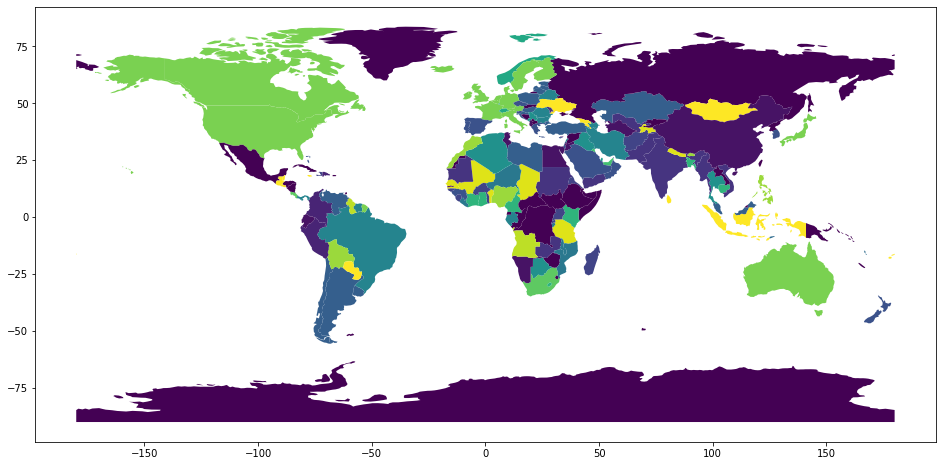

In [107]:
# Plotando o gráfico
all_data.plot(column='cluster_kmeans', figsize=(18, 8), );